# Handwritten Digit Classification using ANN
## authour : Riasad Alvi 
### 6 Jan 2025
1. Each img is 28x28 px -> 728 total
2. so for NN I am taking -> 728 input parameters
3. as I need to show output(digits) 0-9 total possible output is 10 -> so 10 nodes in output layer
4. and I am taking 128 nodes in the hidden layer

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
# dividing dataset for train and test : 
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [7]:
# these are pixel values of images : 
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
# total 60000 images and each img is 28 by 28 numpy array : 
X_train.shape

(60000, 28, 28)

In [13]:
# one img : 
X_train[0].shape

(28, 28)

In [15]:
# labels -> in each img which digit is accually there 
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

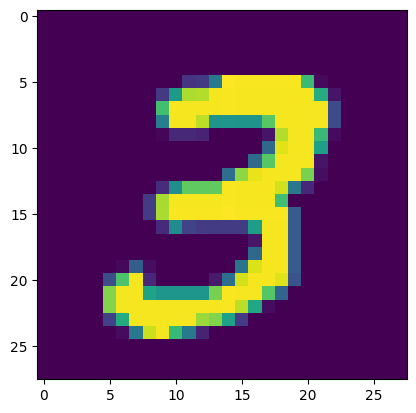

In [19]:
# this is a img : 
import matplotlib.pyplot as plt
plt.imshow(X_train[7])

In [24]:

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [25]:
# each pixels are stored in array and ranges from 0 to 255 
# while training NN we need to have numbers in similar range
# so we will divide each with the maximum value (255) , this will convert whole elements between 0 to 1 
X_train = X_train/255
X_test = X_test/255

In [27]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [30]:
model = Sequential()
# the img is in 2D shape but to train NN we need to convert in to 1D (Flatten)
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu')) # hidden layer 1 , input will automatically come from flatten 
model.add(Dense(32,activation='relu')) # hidden layer 2
model.add(Dense(10,activation='softmax')) # output 

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [34]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9921 - loss: 0.0220 - val_accuracy: 0.9732 - val_loss: 0.1059
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9940 - loss: 0.0184 - val_accuracy: 0.9759 - val_loss: 0.1032
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9955 - loss: 0.0140 - val_accuracy: 0.9753 - val_loss: 0.1109
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9960 - loss: 0.0130 - val_accuracy: 0.9747 - val_loss: 0.1192
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9965 - loss: 0.0106 - val_accuracy: 0.9757 - val_loss: 0.1218
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9947 - loss: 0.0148 - val_accuracy: 0.9753 - val_loss: 0.1240
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9971 - loss: 0.0089 - val_accuracy: 0.9752 - val_loss: 0.1344
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9964 - loss: 0.0105 - 

In [36]:
# will return probability for each img : ex : for img1 y_prob is 5.7 means 57%
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [39]:
# now for each img we need to take the biggest probability : 
y_prob[0]

array([8.3071683e-22, 7.7111038e-19, 1.1901906e-16, 9.4409491e-10,
       1.2499779e-21, 6.4735285e-15, 4.9302876e-31, 9.9998832e-01,
       3.9124310e-14, 1.1631221e-05], dtype=float32)

In [44]:
# this will give the biggest probability for each index : 
y_pred = y_prob.argmax(axis=1)

In [45]:
y_pred[0]

7

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9778

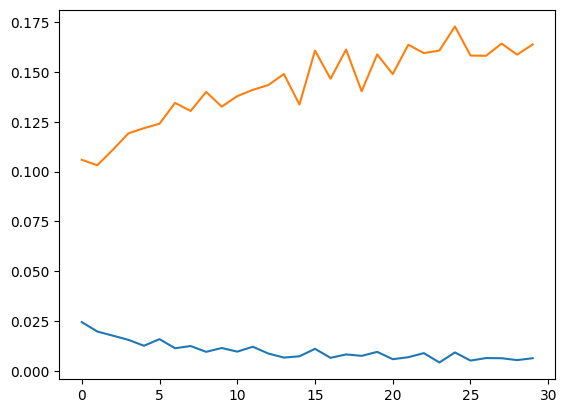

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

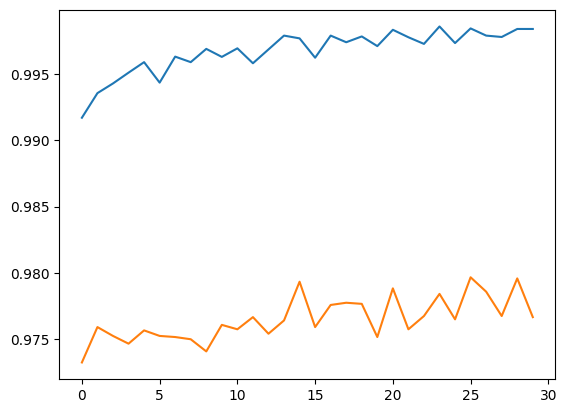

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

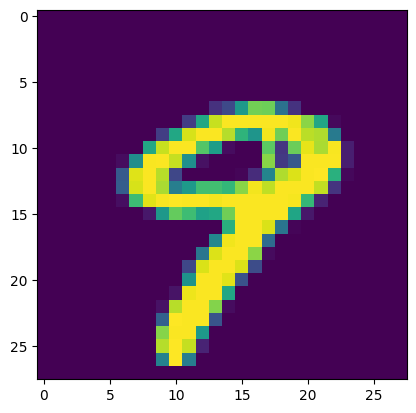

In [56]:
# actual img : 
plt.imshow(X_test[9])

In [57]:
# predicted img : 
model.predict(X_test[9].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([9])